In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import geoplot.crs as ccrs
%matplotlib inline

In [3]:
collisions = pd.read_csv("./data/NYPD Motor Vehicle Collisions.csv", index_col=0)
collisions = gpd.GeoDataFrame(collisions, geometry=collisions.apply(lambda srs: Point(srs['LONGITUDE'], srs['LATITUDE']), axis='columns'))

In [4]:
census_tracts = gpd.read_file("./data/nyc_census_tracts_2010.geojson", driver='GeoJSON')

In [5]:
from geoplot import geoplot as gplt

In [6]:
cc = collisions.head(1000)[collisions.head(1000).apply(lambda srs: pd.notnull(srs['geometry'].x) and pd.notnull(srs['geometry'].y), axis='columns')]

In [7]:
cities = gpd.read_file("./data/citiesx010g.shp")
cities_m = cities[cities['STATE'].map(lambda s: s not in ['PR', 'AK', 'HI', 'VI'])]

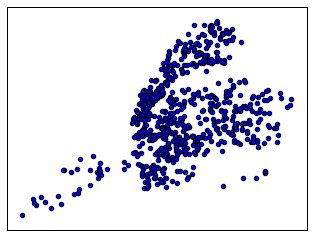

In [8]:
gplt.pointplot(cc, projection=ccrs.PlateCarree())

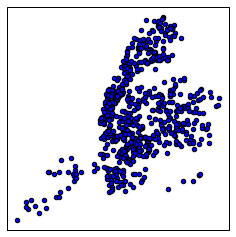

In [9]:
gplt.pointplot(cc, projection=ccrs.AlbersEqualArea())

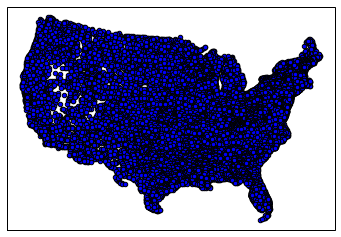

In [21]:
gplt.pointplot(cities_m, projection=ccrs.AlbersEqualArea())

In [8]:
from random import randint
census_tracts['mock_data'] = [randint(10, 1000) for _ in range(len(census_tracts))]

In [20]:
census_tracts.geometry.name

'geometry'

> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(136)choropleth()
-> for cat, geom in zip(values, df.geometry):
(Pdb) c


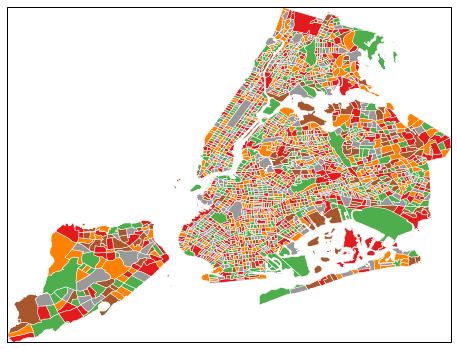

In [40]:
gplt.choropleth(census_tracts, data='mock_data', projection=ccrs.PlateCarree(), edgecolor='white', linewidth=0.5)

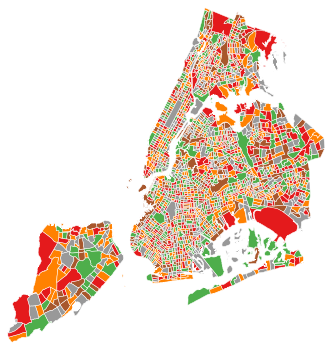

In [35]:
gplt.choropleth(census_tracts, data='mock_data', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5)

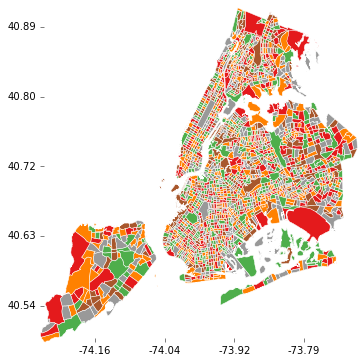

In [36]:
gplt.choropleth(census_tracts, data='mock_data', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5,
                spines=True, scheme='QUANTILES')